In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [2]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.25 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


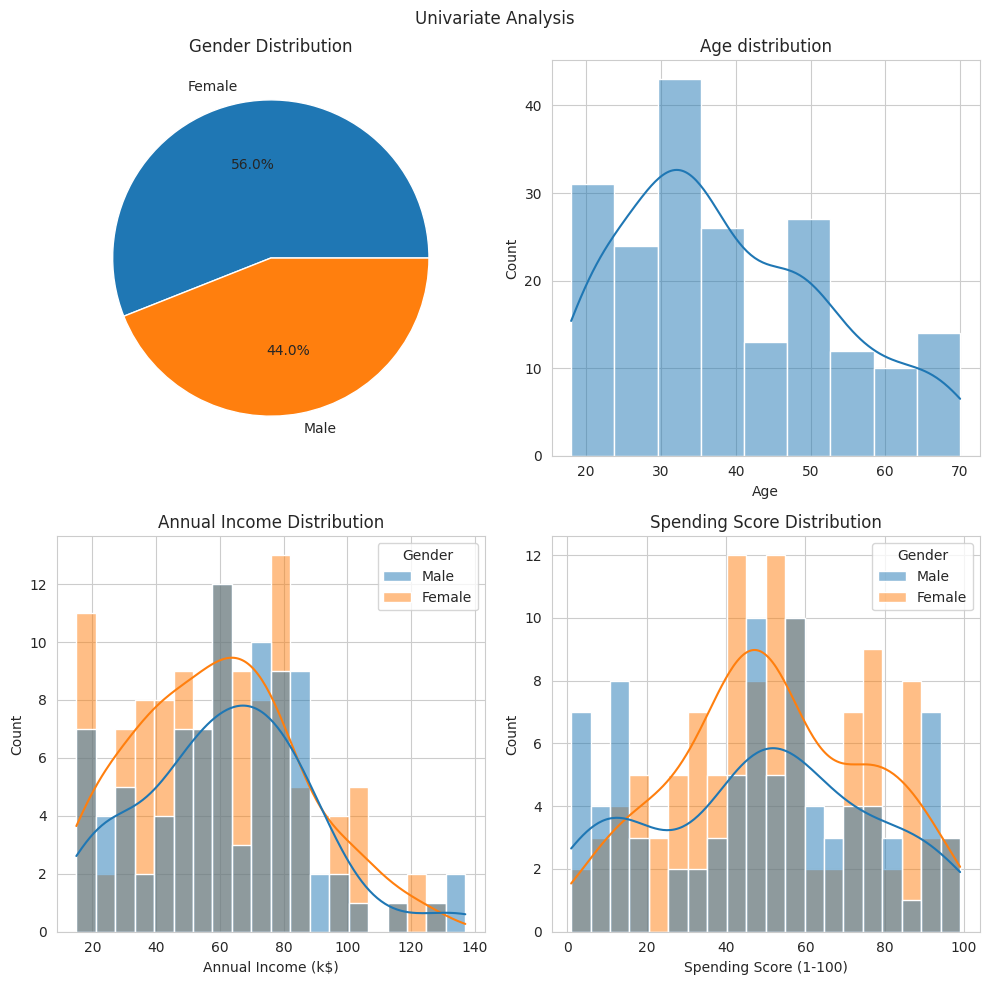

In [6]:
#univariate Analysis
fig,axes=plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Univariate Analysis")

# Fix: Use axes[0,0].pie() for the pie chart
axes[0,0].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
axes[0,0].set_title("Gender Distribution")


sns.histplot(ax=axes[0,1],data=df,x='Age',kde=True).set_title("Age distribution")

sns.histplot(ax=axes[1,0], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')

sns.histplot(ax=axes[1,1], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

Population of female is slightly on higher side in comparison to male.

Most people are around the age of 20-40 who spend on shopping and it peak around 30 which says whether that person is working or some income source directly or indirectly



In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Figure size 640x480 with 0 Axes>

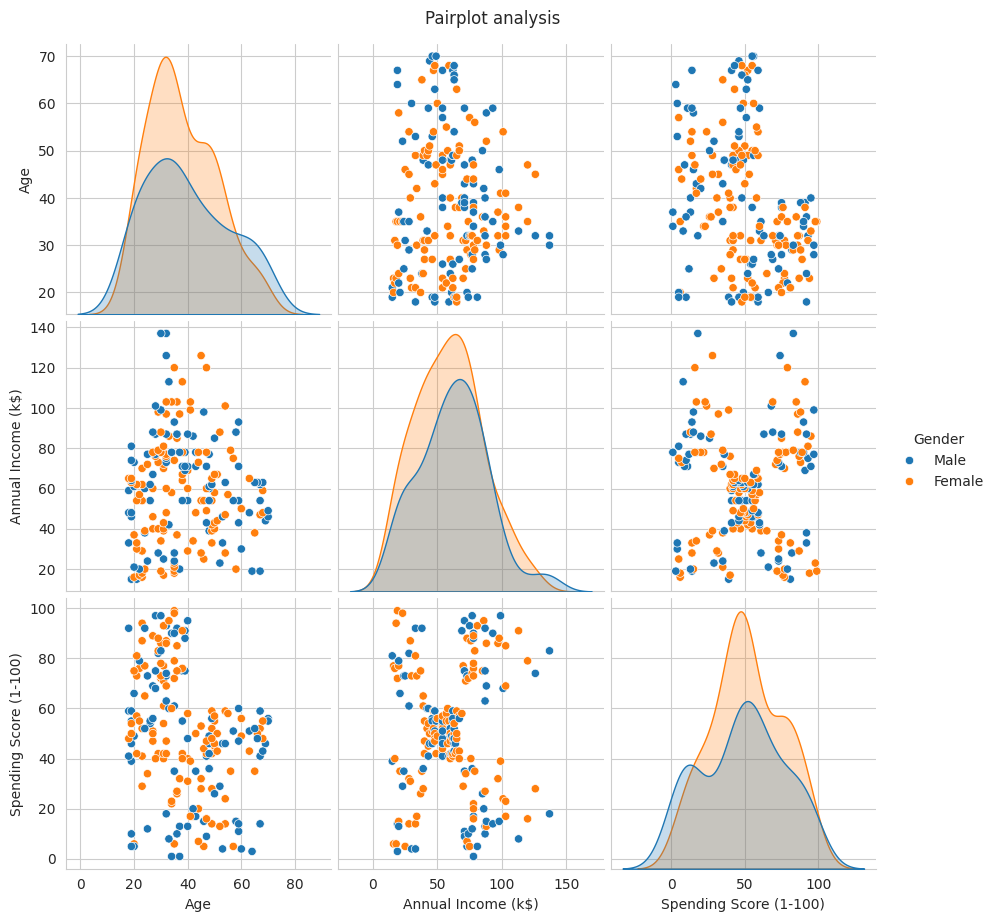

In [8]:
#pairplot analysis
plt.figure() # This line is not needed, pairplot creates its own figure
sns.pairplot(df,vars=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], height=3, hue='Gender') # Use height to control figure size and hue for color
plt.suptitle("Pairplot analysis", y=1.02) # Adjust title position
plt.show()

Females (orange) peak around 50–55 years, while males (blue) peak slightly lower, around 40–45 years

Distribution is roughly normal, with most people clustered in the middle (~60k–80k).

Suggests balanced spending behavior, no major gender bias

Both young and older customers exist across income ranges.

Some clusters visible (younger high spenders, older moderate spenders).

Indicates potential customer segments (good for clustering analysis like K-Means).

In [9]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

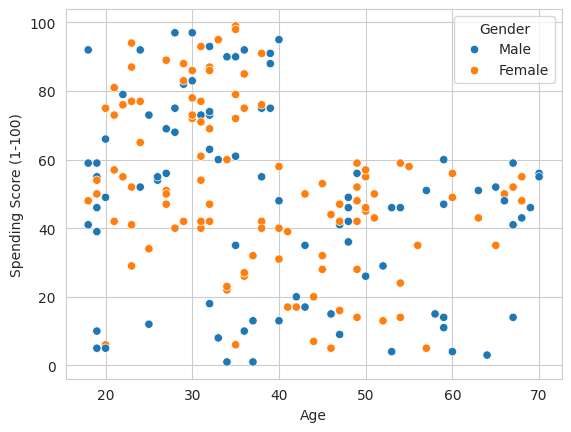

In [10]:
#analyse the age vs spending score

sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,hue='Gender')

Insights: As we can see mostly dots are  on the higher side of >40 around the age of 20-40 and after the age of 40 we an see  near to constant spending score of max 60.

In [11]:
df[['Age','Spending Score (1-100)']].describe()

,Age,Spending Score (1-100)
count,200.000000,200.000000
mean,38.850000,50.200000
std,13.969007,25.823522
min,18.000000,1.000000
25%,28.750000,34.750000
50%,36.000000,50.000000
75%,49.000000,73.000000
max,70.000000,99.000000


summary of the statistics for 'Age' and 'Spending Score (1-100)':

**Age:**
*   The average age of customers is around 38.85 years.
*   A majority of customers are between 28.75 and 49 years old (25th to 75th percentile).
*   The youngest customer is 18 and the oldest is 70.
*   The standard deviation of 13.97 suggests a moderate spread in age.

**Spending Score (1-100):**
*   The average spending score is 50.2.
*   Half of the customers have a spending score around 50 (median).
*   The scores range from a minimum of 1 to a maximum of 99.
*   The standard deviation of 25.82 indicates a relatively large spread in spending scores, suggesting diverse spending habits among customers.

In [12]:
#feature Engineering
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
#constructing new features,

#spending score relative to annual income

df['Spending_to_Income_Ratio']=df['Spending Score (1-100)']/df['Annual Income (k$)']


#annual income to age
df['Annual_Income_to_Age']=df['Annual Income (k$)']/df['Age']






I have constructed only 2 features out of data , as I have extracted other features like age group and income group but that lead to poor results , so I have avoid doing that becoz of distances between categories become arbitrary.

so I have stick to basic ratio features for this dataset.
My thought process is to go with columns that have logical relationship like with age salary increases and mostly old people don't spend that much wrt their salary

In [14]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending_to_Income_Ratio,Annual_Income_to_Age
0,Male,19,15,39,2.600000,0.789474
1,Male,21,15,81,5.400000,0.714286
2,Female,20,16,6,0.375000,0.800000
3,Female,23,16,77,4.812500,0.695652
4,Female,31,17,40,2.352941,0.548387
...,...,...,...,...,...,...
195,Female,35,120,79,0.658333,3.428571
196,Female,45,126,28,0.222222,2.800000
197,Male,32,126,74,0.587302,3.937500
198,Male,32,137,18,0.131387,4.281250


In [15]:
X=df.drop(['Spending Score (1-100)','Age','Gender'],axis=1)


In [16]:
X.head()

,Annual Income (k$),Spending_to_Income_Ratio,Annual_Income_to_Age
0,15,2.600000,0.789474
1,15,5.400000,0.714286
2,16,0.375000,0.800000
3,16,4.812500,0.695652
4,17,2.352941,0.548387


In [17]:
X.isnull().sum()

,0
Annual Income (k$),0
Spending_to_Income_Ratio,0
Annual_Income_to_Age,0


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.cluster import KMeans




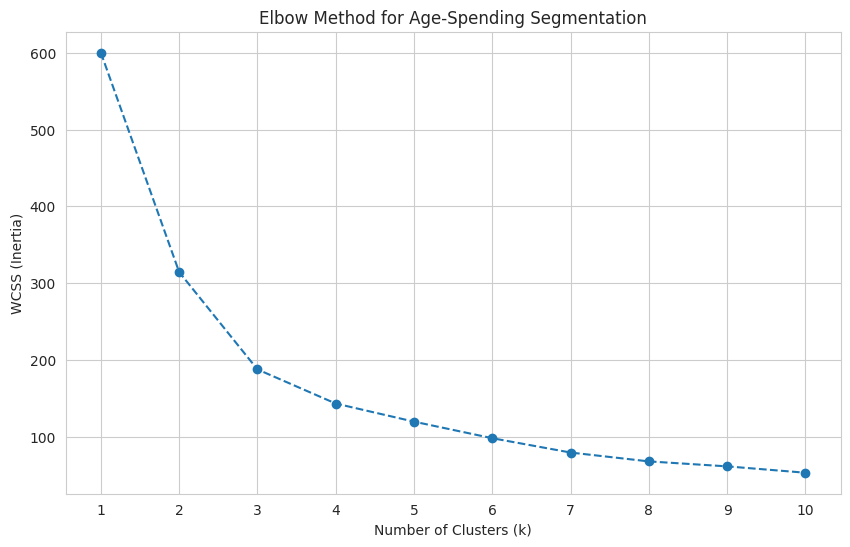

In [20]:
# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [21]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X_scaled)

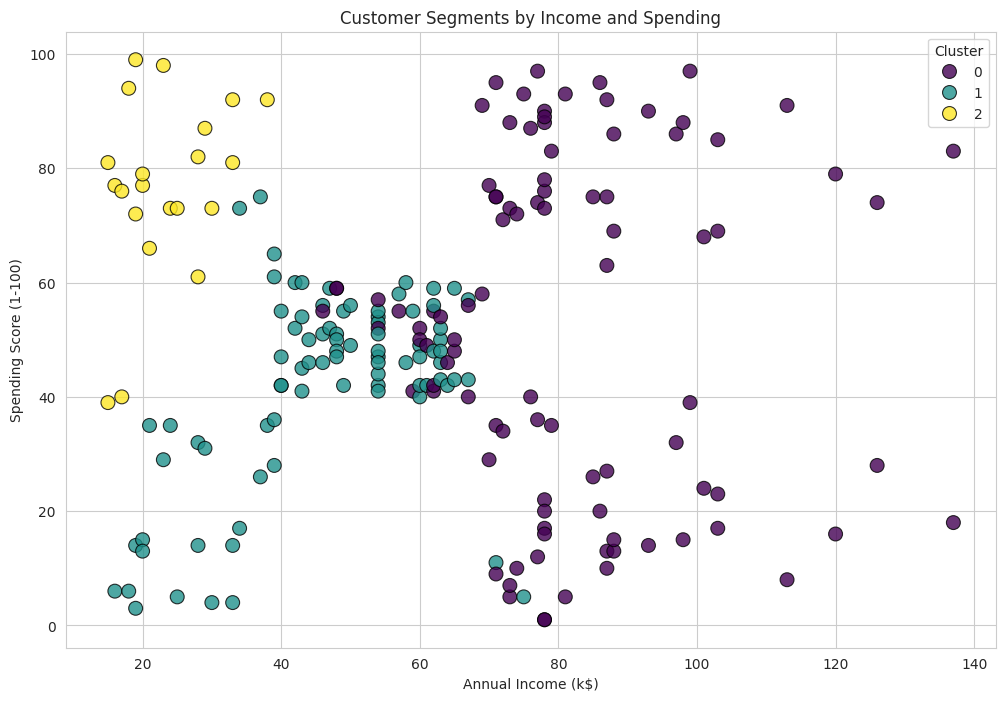

In [22]:
#visualise
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

scores = {}
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)
print(scores)


{2: np.float64(0.43321334192259753), 3: np.float64(0.456437025305016), 4: np.float64(0.3984957609241402), 5: np.float64(0.39804574907220397), 6: np.float64(0.39621635005638306), 7: np.float64(0.39211454239885385), 8: np.float64(0.39519413938435904), 9: np.float64(0.38872883325346536), 10: np.float64(0.3815435101952869)}


In [26]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

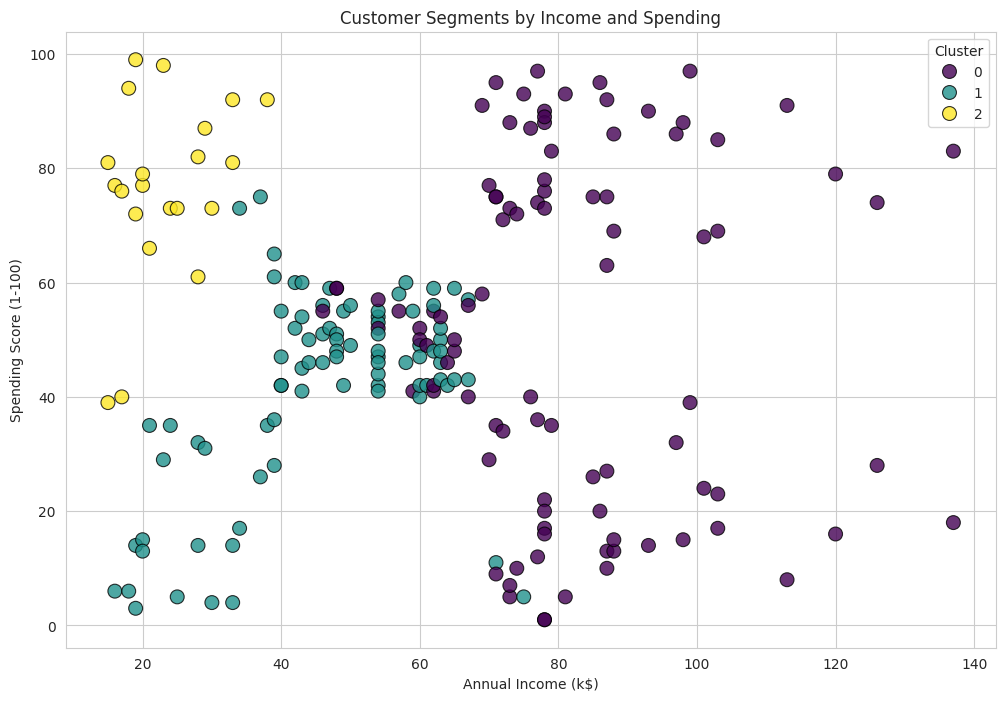

In [27]:
#visualise
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

Results: I have tried clustering with this features but it is not effective against this dataset in comparison to original features.